In [3]:
%matplotlib inline
import altair as alt
from altair import Chart
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_palette(palette='colorblind')

/home/osvaldo/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/osvaldo/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Según el Zen de Python

    There should be one --and preferably only one-- obvious way to do it.

Sin embargo tenemos.

* Matplotlib --> El límite es el cielo y la paciencia. 
* Seaborn --> gráficos estadísticos (basado en Matplotlib)
* Bokeh --> D3.js web-oriented
* Pandas --> Tiene algunas funciones simples para graficar
* yhat’s ggplot2 --> Port de ggplot a Python
* ....
* Altair



## Altair

* Altair es una biblioteca de Python para visualización en estadística.
* Está basada en [Vega-Lite](https://vega.github.io/vega-lite/).
* Es _declarativa_, se le indica que se quiere hacer y no como (imperativo).
* Es muy reciente y bajo desarrollo activo!
* El objetivo es ofrecer una interfaz simple, clara y amigable. Que permita generar visualizaciones _bellas_ y _efectivas_ con un mínimo de código.

Altair no grafica nada, solo genera código en formato JSON que es interpretado por vega-lite y _renderizado_ por D3.js 

La intención de los desarrolladores es que vega/vega-lite se convierta en una _lingua franca_ en visualización de datos y que el usuario puede elegir el _renderer_ (matplotlib, Bokeh, etc)

Gramática de visualización

Las visualizaciones (estadísticas) pueden expresarse como la combinación de un número _reducido_ de abstracciones.

* Datos. La materia prima.
* Transformaciones. Agrupamientos, estadísticos, proyecciones...
* Guías. Leyendas, ejes...
* Marks. Formas, colores, tamaños que representan a los datos

## Instalación

    pip install altair
    pip install --upgrade notebook
    jupyter nbextension install --sys-prefix --py vega

    conda install altair --channel conda-forge

In [4]:
cars = alt.load_dataset('cars')
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


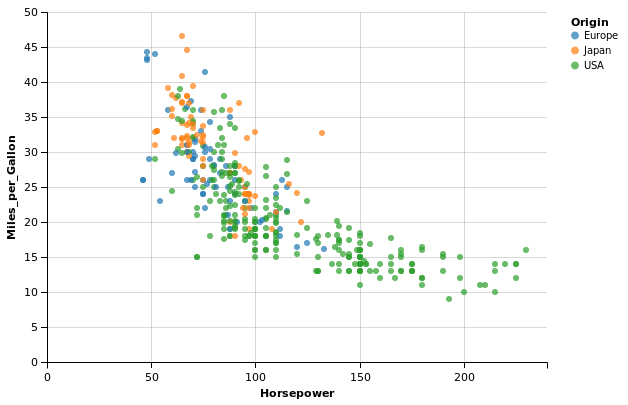

In [5]:
Chart(cars).mark_circle().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin')

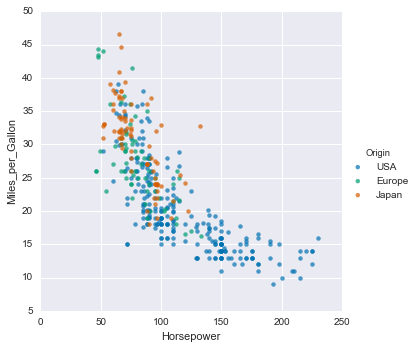

In [6]:
ax = sns.lmplot(x="Horsepower",
           y="Miles_per_Gallon",
           hue="Origin",
           data=cars,
           fit_reg=False,
           scatter_kws={'alpha': 0.7})

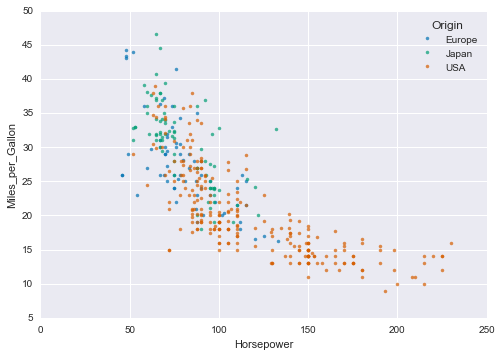

In [7]:
def scatter(group):
    plt.plot(group['Horsepower'], group['Miles_per_Gallon'],
             '.', label=group.name, alpha=0.7)

cars.groupby('Origin').apply(scatter)
plt.legend(title='Origin')
plt.xlabel('Horsepower')
plt.ylabel('Miles_per_Gallon');

# Veamos algunos detalles de Altair

In [9]:
datos = pd.DataFrame({'a': list('CCCDDDEEE'),
                      'b': [2, 7, 4, 1, 2, 6, 8, 4, 7]})
datos

,a,b
0,C,2
1,C,7
2,C,4
3,D,1
4,D,2
5,D,6
6,E,8
7,E,4
8,E,7


## Chart

El objeto fundamental en Altair es `Chart`. Toma un _dataframe_ como argumento.

In [10]:
chart = Chart(datos)

`Chart` sabe como generar un diccionario JSON representando los datos y 
_codificaciones visuales_ (más adelante). Esta información es enviada a la notebook y _renderizada_ por Vega-Lite.

In [11]:
chart.to_dict()

{'data': {'values': [{'a': 'C', 'b': 2},
   {'a': 'C', 'b': 7},
   {'a': 'C', 'b': 4},
   {'a': 'D', 'b': 1},
   {'a': 'D', 'b': 2},
   {'a': 'D', 'b': 6},
   {'a': 'E', 'b': 8},
   {'a': 'E', 'b': 4},
   {'a': 'E', 'b': 7}]}}

## Chart Marks

Lo próximo es decidir que *mark* usaremos para representar los datos. Por ejemplo podemos usar puntos.

In [12]:
chart = Chart(datos).mark_point()
chart

El resultado es un punto por fila. Pero los puntos están uno encima de otro. El JSON se ha actualizado

In [13]:
chart.to_dict()

{'data': {'values': [{'a': 'C', 'b': 2},
   {'a': 'C', 'b': 7},
   {'a': 'C', 'b': 4},
   {'a': 'D', 'b': 1},
   {'a': 'D', 'b': 2},
   {'a': 'D', 'b': 6},
   {'a': 'E', 'b': 8},
   {'a': 'E', 'b': 4},
   {'a': 'E', 'b': 7}]},
 'mark': 'point'}

## Codificaciones de datos (*data encodings*)

El próximo paso consiste en agregar *codificaciones visuales * (o simplemente *[codificaciones](https://altair-viz.github.io/documentation/encoding.html)*). Una codificación visual especifica como una columna de datos es mapeada en una visulización.
Algunas de las codificaciones visuales son:

* X: valores eje x
* Y: valores eje y
* Color: colores de los _marcadores_
* Opacity: transparecia de los _marcadores_ (alpha)
* Shape: formas de los _marcadores_
* Size: tamaño de los _marcadores_
* Row: filas en una grilla de gráficos de facetas
* Column: columnas en una grilla de gráficos de facetas

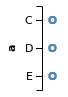

In [14]:
c = Chart(datos).mark_point().encode(y='a')
c

In [15]:
c.to_dict()

{'data': {'values': [{'a': 'C', 'b': 2},
   {'a': 'C', 'b': 7},
   {'a': 'C', 'b': 4},
   {'a': 'D', 'b': 1},
   {'a': 'D', 'b': 2},
   {'a': 'D', 'b': 6},
   {'a': 'E', 'b': 8},
   {'a': 'E', 'b': 4},
   {'a': 'E', 'b': 7}]},
 'encoding': {'y': {'field': 'a', 'type': 'nominal'}},
 'mark': 'point'}

Altair determina de forma automática el tipo de variables. Altair soporta cuatro tipo de variables primitivas:

<table>
  <tr>
    <th>Tipo de datos</th>
    <th>Codigo</th>
    <th>Descripción</th>
  </tr>
  <tr>
    <td>cuantitativa</td>
    <td>Q</td>
    <td>Reales</td>
  </tr>
  <tr>
    <td>nominal</td>
    <td>N</td>
    <td>Categórica desordenada</td>
  </tr>
  <tr>
    <td>ordinal</td>
    <td>O</td>
    <td>Categórica ordenada</td>
  </tr>
  <tr>
    <td>temporal</td>
    <td>T</td>
    <td>fechas</td>
  </tr>
</table>

Es posible ajustar el tipo de datos de forma explícita usando el código de una letra:

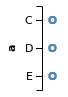

In [16]:
Chart(datos).mark_point().encode(y='a:N')

Agregemos otro _canal_ a la codificación. Usemos la columna `b` como la posición `x`:

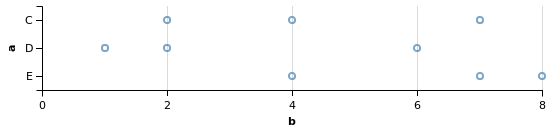

In [17]:
Chart(datos).mark_point().encode(
    y='a',
    x='b')

en vez de puntos podemos usar barras (las barras quedan superpuestas!)

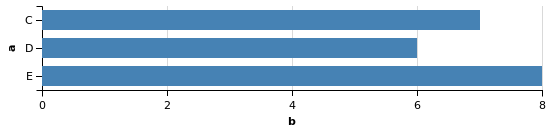

In [18]:
Chart(datos).mark_bar().encode(
    y=('a'),
    x=('b'))

Otros [marcadores](https://altair-viz.github.io/documentation/marks.html)

* mark_area()
* mark_bar()
* mark_circle()
* mark_line()
* mark_point()
* mark_rule()
* mark_square()
* mark_text()
* mark_tick()

## Transformación de datos

Altair y Vega-Lite permiten hacer varias transformaciones a los datos. La forma más fácil de lograrlo es usando un _string_ en el nombre de la columna de datos. Por ejemplo en vez de graficar todos los valores de `b` podemos graficar el promedio.

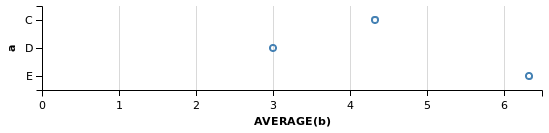

In [19]:
Chart(datos).mark_point().encode(
    y='a',
    x='average(b)')

Uno de los beneficios de Altair es que su API permite escribir especificaciones para Vega-Lite de forma más simple y breve.

In [20]:
from altair.api import AggregateOp
print(AggregateOp().values)

['values', 'count', 'valid', 'missing', 'distinct', 'sum', 'mean', 'average', 'variance', 'variancep', 'stdev', 'stdevp', 'median', 'q1', 'q3', 'modeskew', 'min', 'max', 'argmin', 'argmax']


## Personalizando las gráficas

Altair trata de ser _inteligente_ en cuanto a los valores por defectos, pero en caso de ser necesario es posible modificar los valores por defectos.

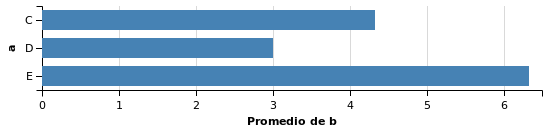

In [36]:
Chart(datos).mark_bar().encode(
    y='a',
    x=alt.X('mean(b)', axis=alt.Axis(title='Promedio de b')))

Las propiedades de las _marcadores_ se modifican pasando argumentos al método `mark_*()`:

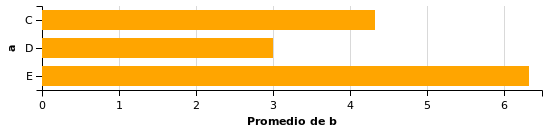

In [42]:
Chart(datos).mark_bar(color='orange').encode(
    y='a',
    x=alt.X('mean(b)', axis=alt.Axis(title='Promedio de b')))

De forma similar existen varios métodos `configure_*()` que permiten ajustar propiedades globales, como el ancho y alto del gráfico.

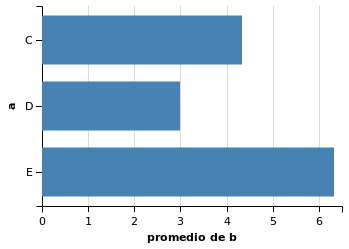

In [73]:
c = Chart(datos).mark_bar().encode(
    y='a',
    x=alt.X('average(b)', axis=alt.Axis(title='promedio de b'))
).configure_scale(
    bandSize=50  # scale.bandSize adjusta el grosor (pixels) de las barras
).configure_cell(
    width=300)   # cell.width adjusta el ancho (pixels) del gráfico

c

In [74]:
c.to_dict(data=False)

{'config': {'cell': {'width': 300.0}, 'scale': {'bandSize': 50.0}},
 'encoding': {'x': {'aggregate': 'average',
   'axis': {'title': 'promedio de b'},
   'field': 'b',
   'type': 'quantitative'},
  'y': {'field': 'a', 'type': 'nominal'}},
 'mark': 'bar'}

Para aprender más sobre otras opciones de configuración se puede explorar el objeto `Config` usando jupyter.

In [75]:
alt.Config?

## Algunos ejemplos de otros gráficos

In [40]:
lolo =  pd.DataFrame({'x': np.random.normal(0, 1, 100)})

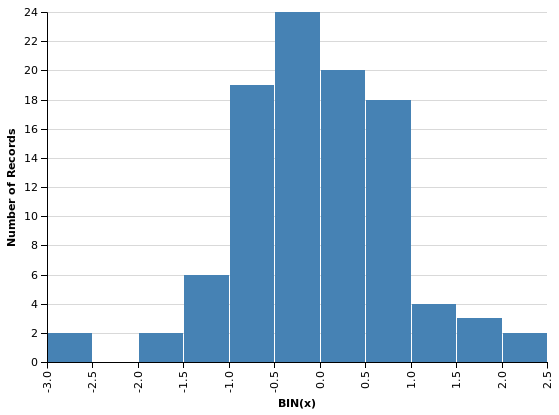

In [41]:
Chart(lolo).mark_bar().encode(
    x=alt.X('x', bin=alt.Bin(maxbins=20)),
    y='count(*)')

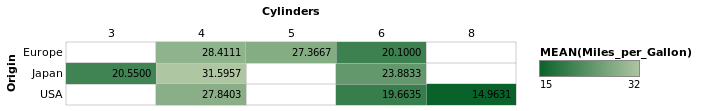

In [35]:
Chart(cars).mark_text(applyColorToBackground=True).encode(
    alt.Row('Origin:O'),
    alt.Column('Cylinders:O'),
    alt.Color('mean(Miles_per_Gallon):Q', sort='descending'),
    alt.Text('mean(Miles_per_Gallon):Q'))

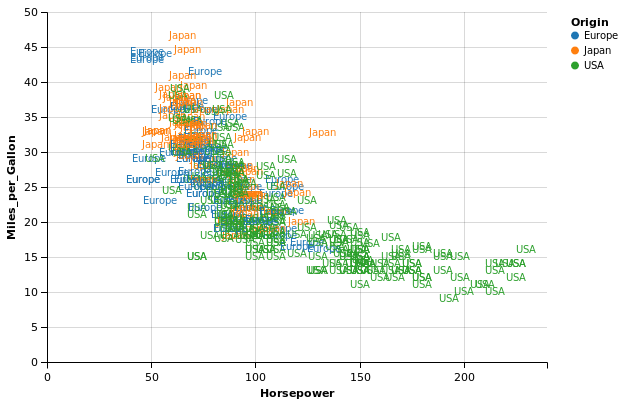

In [47]:
Chart(cars).mark_text().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
    text='Origin')

In [49]:
stocks = alt.load_dataset('stocks')

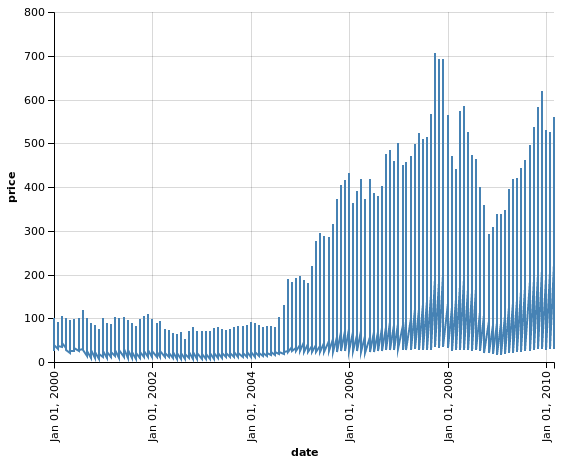

In [53]:
Chart(stocks).mark_line().encode(
    x='date:T',
    y='price:Q')

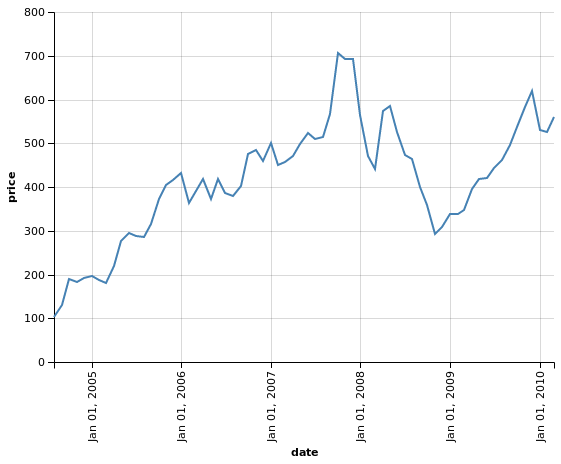

In [54]:
Chart(stocks).mark_line().encode(
    x='date:T',
    y='price:Q'
).transform_data(filter="datum.symbol==='GOOG'")

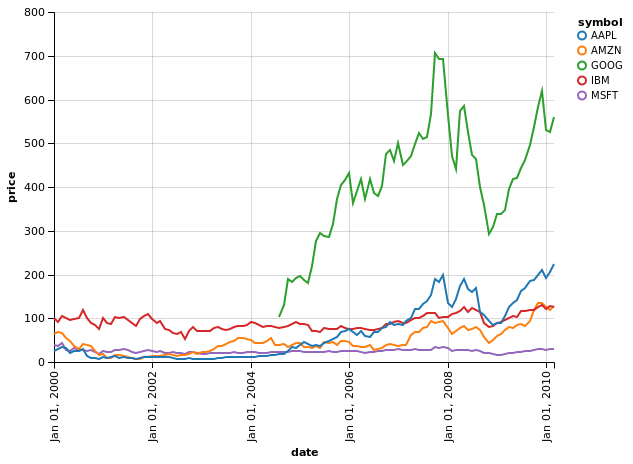

In [56]:
Chart(stocks).mark_line().encode(
    x='date:T',
    y='price',
    color='symbol')

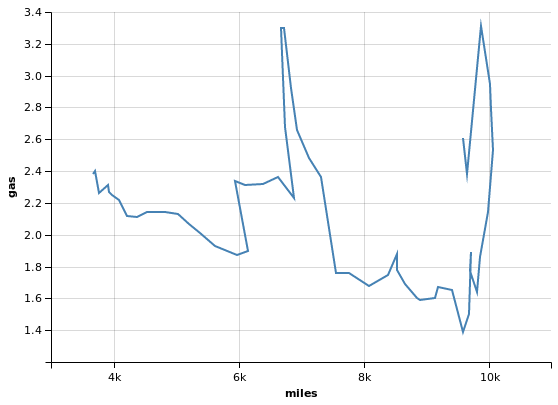

In [60]:
data = alt.load_dataset('driving')
Chart(data).mark_line().encode(
    alt.X('miles', scale=alt.Scale(zero=False)),
    alt.Y('gas', scale=alt.Scale(zero=False)),
    path='year:T',
)

## Para seguir leyendo

[Charla](https://www.youtube.com/watch?v=aRxahWy-ul8) de uno de los desarrolladores

[Comparación entre varias bibliotecas de visualización](https://github.com/dsaber/py-viz-blog)